In [1]:
import sys
import os
sys.path.insert(0, f'{os.getenv("HOME")}/Devel/simgio/PYsimgio/')

import simgio_utils as su
import matplotlib.pyplot as plt
import pandas as pd

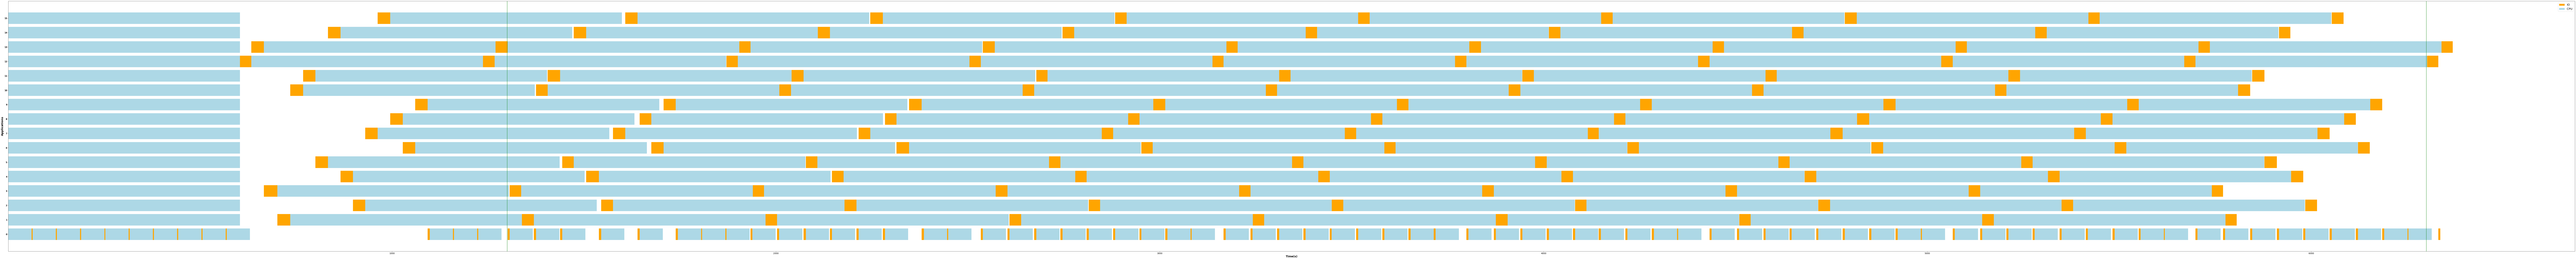

In [2]:
phase01 = su.load_phases('1hf_15lf_exclusive_0_phases.csv')
su.execution_graph(phase01, timeframe_start=1300, timeframe_end=6300)

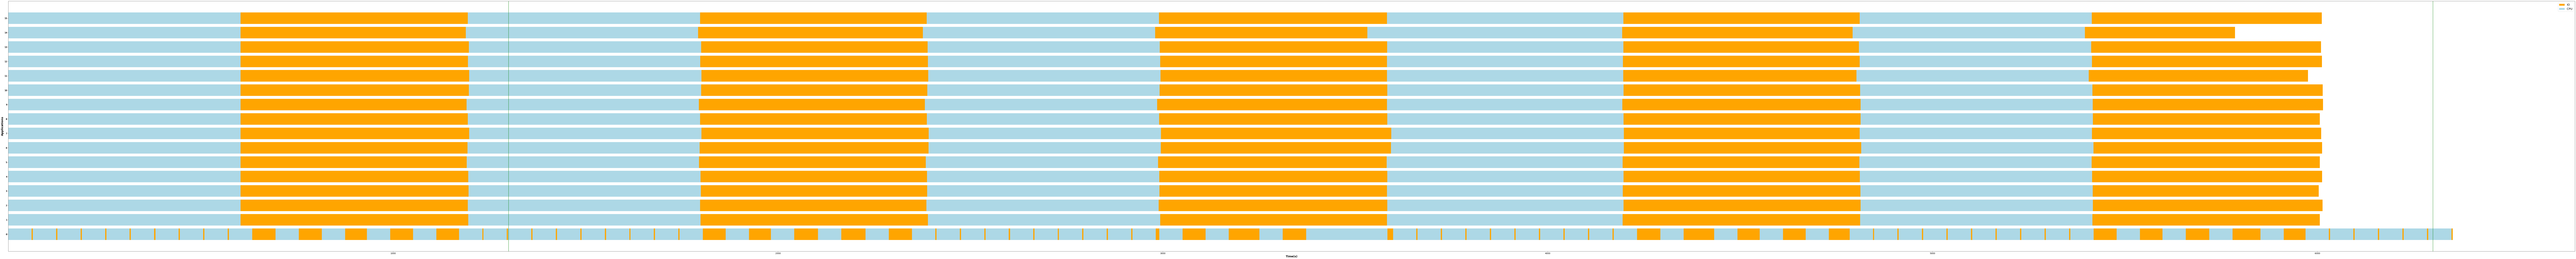

In [3]:
phase01 = su.load_phases('1hf_15lf_fairshare_0_phases.csv')
su.execution_graph(phase01, timeframe_start=1300, timeframe_end=6300)

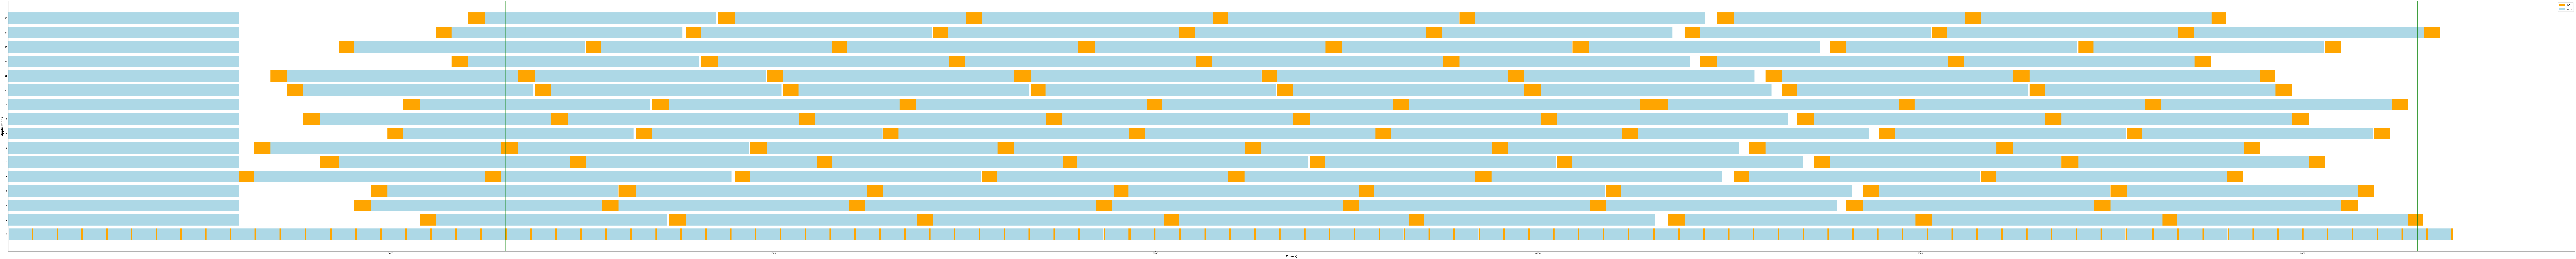

In [4]:
phase01 = su.load_phases('1hf_15lf_set10_0_phases.csv')
su.execution_graph(phase01, timeframe_start=1300, timeframe_end=6300)


# Practical results

In [5]:
df = pd.read_csv("results/8hf_8lf_set10_0_phases.csv", sep=';')
columns = ['scheduler', 'hf_apps', 'lf_apps',  'max_stretch', 'utilization']
#df = df[columns]

df = df.rename({'hf_apps': 'nh'}, axis=1)

df_exclusive = df.loc[df.scheduler == 'exclusive']
df_fairshare = df.loc[df.scheduler == 'fairshare']
df_set10 = df.loc[df.scheduler == 'set10']

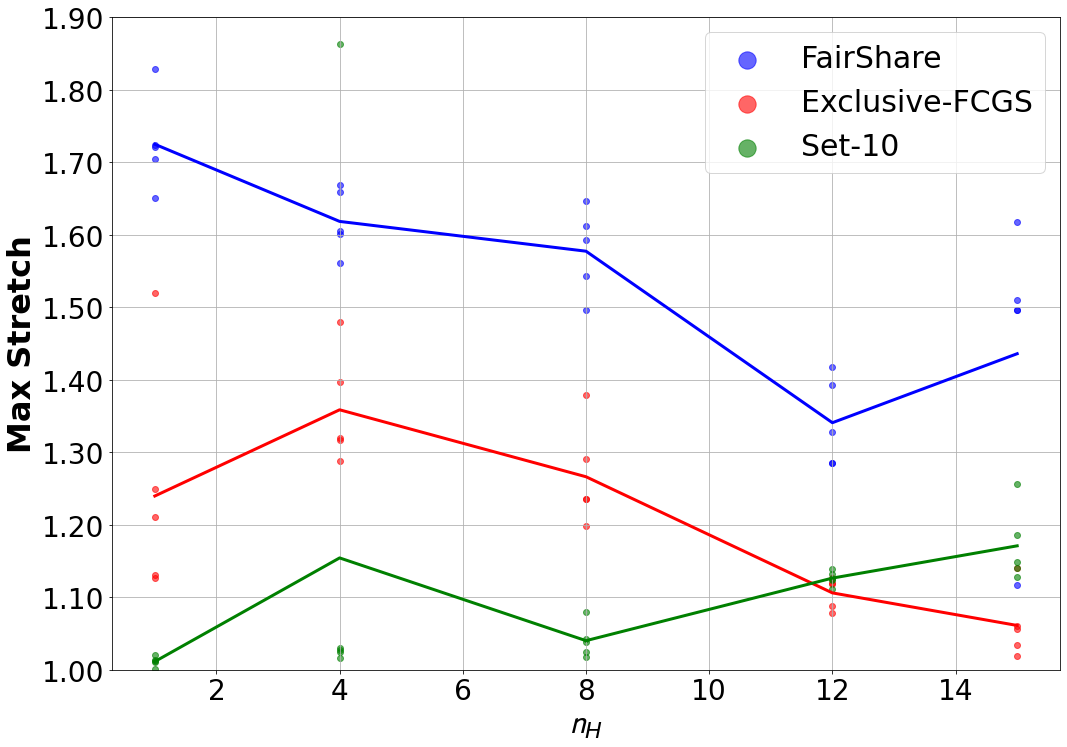

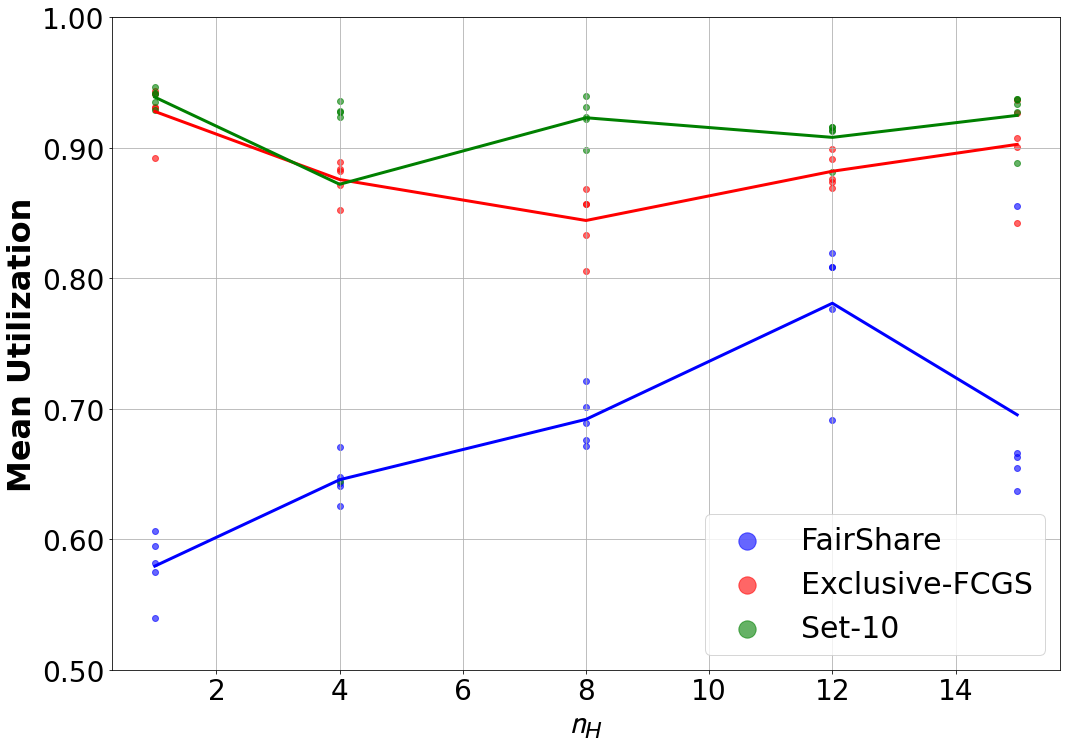

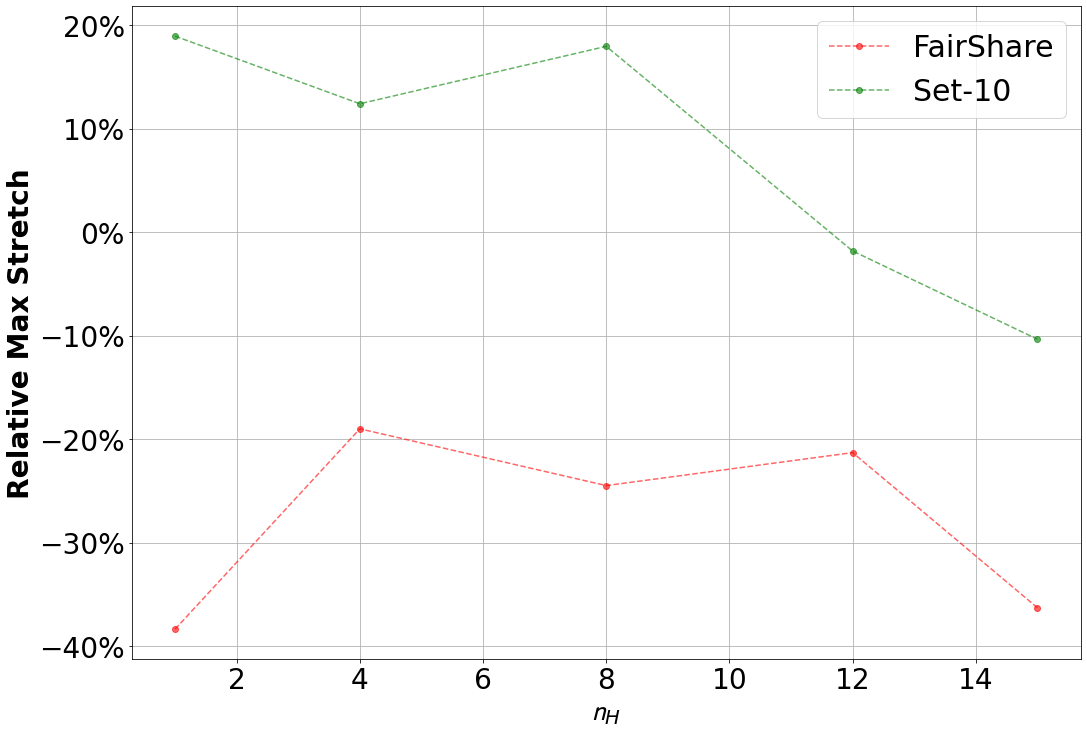

In [16]:
x_plot = [1, 4, 8, 12, 15]
colors = ['blue', 'red', 'green']

g = {'FairShare': df_fairshare,
     'Exclusive-FCGS': df_exclusive, 
     'Set-10': df_set10}


su.plot_stretch_max(g=g, colors=colors, show=True, save_to="practical_stretch.pdf", ylim=(1,1.9), figsize=(17, 12),  x_plot=x_plot)


su.plot_scatter_utilization(g=g, colors=colors, show=True, save_to="practical_utilization.pdf", ylim=(0.5, 1), figsize=(17, 12), x_plot=x_plot)



values = su.plot_stretch_max_norm(g={'FairShare': df_fairshare,
   
     'Set-10': df_set10},df= df_exclusive, colors= ['red', 'green'], show=True, figsize=(17, 12))



In [7]:
ex = df_exclusive.groupby('nh').utilization.mean().mean()
set = df_set10.groupby('nh').utilization.mean().mean()
fair = df_fairshare.groupby('nh').utilization.mean().mean()



In [8]:
((set - ex)/ set) * 100

2.9395450999730937

In [9]:
((set - fair)/ set) * 100

25.69844836739498

In [10]:
values.mean()

0.0741289684705014

In [11]:
from collections import OrderedDict
from pathlib import Path
from typing import Dict, List
from scipy import stats

import math
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as mtick

def plot_scatter_utilization(g, colors=None, title=None, show=False, save_to=None, figsize=(17, 8),  x_plot=None, granularity=2):
    """
   Receives a dictionary with pandas dataframes and generates the scatter graph
   x-axis  shows the number of applications in the Nh set and the y-axis presents utilization
   :param g: a dictionary whose keys are the scheduling heuristic names and values are dataframes
   :param title: graph titles (optional)
   :param save_to:  full path where the file (pdf) will be saved (optional)
   :param figsize: the size of the graph (optional)
   """
    fig, ax = plt.subplots(1, figsize=figsize)

    y_values = {}

    color_index = 0
    for key, value in g.items():       

        gb = value.groupby('nh')

        if colors:
            ax.scatter(gb.groups.keys(), gb.utilization.mean(), color=colors[color_index], label=key, alpha=0.6)
            color_index += 1
        else:
            ax.scatter(gb.groups.keys(), gb.utilization.mean(), label=key, alpha=0.6)

        if x_plot:            
            y_values[key] = []
            for v in x_plot:
                initial = v
                final = v + granularity
                y_values[key].append(
                    value.loc[(value.nh >= initial) & (value.nh <= final)].utilization.mean()
                )

    if x_plot:
        color_index = 0
        for key, value in g.items():
            if colors: 
                ax.plot(x_plot, y_values[key], color=colors[color_index], linewidth=3)
                color_index += 1
            else: 
                ax.plot(x_plot, y_values[key], linewidth=3)


    plt.ylabel(r'Utilization', fontsize=32, fontweight='bold')
    plt.xlabel(r'$\mathcal{n}_H$', fontweight='bold', fontsize=32)

    lgnd = plt.legend(prop={'size': 30})
    for i in range(len(lgnd.legendHandles)):
        lgnd.legendHandles[i]._sizes = [300]
    
    # ax.set_yscale('log')

    plt.title(title, fontweight='bold', fontsize=18)

    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.tick_params(axis='both', which='minor', labelsize=28)

    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:0.2f}'))
    ax.yaxis.set_minor_formatter(StrMethodFormatter('{x:0.2f}'))

    ax.set_xticks(x_plot)

    plt.grid()

    if save_to:
        fig.savefig(save_to, format='pdf', dpi=1200)
    if show:
        plt.show()

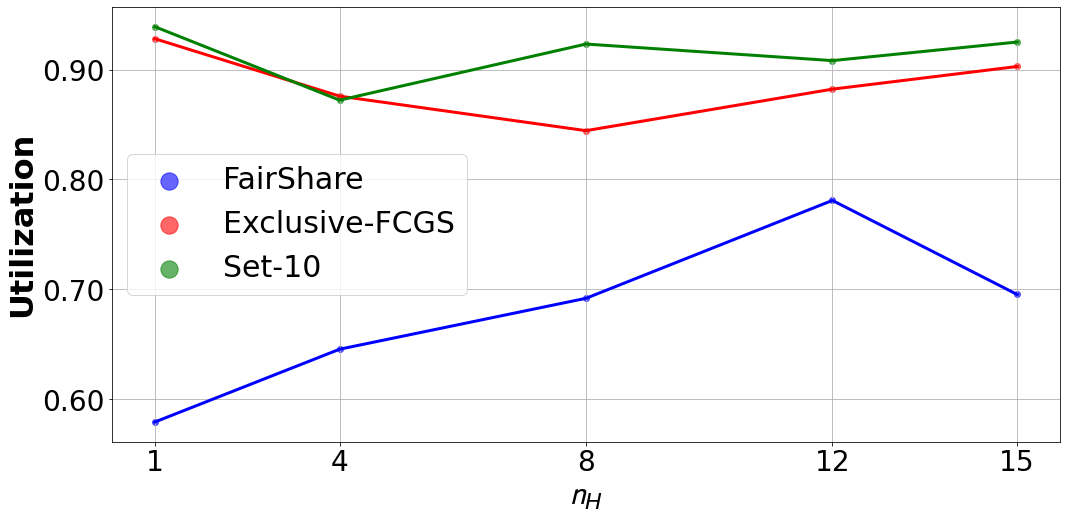

In [12]:

plot_scatter_utilization(g=g, colors=colors, show=True, save_to="practical_utilization.pdf", figsize=(17, 8),  x_plot=x_plot)